# **Important Methods of Pandas DataFrame**

In [180]:
import numpy as np
import pandas as pd
ipl = pd.read_csv('/content/ipl-matches.csv')
movies = pd.read_csv('/content/movies.csv')
runs = pd.read_csv('/content/batsman_runs_ipl.csv')
diabetes = pd.read_csv('/content/diabetes.csv')

## **`value_counts`**
It is applicable on both series and dataframe.

In [181]:
marks_df = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks_df

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [182]:
marks_df.value_counts()

,,,count
iq,marks,package,
80,70,14,2
90,70,7,1
100,80,10,1
120,100,14,1


In [183]:
# ipl.head()
# ipl['Player_of_Match'].value_counts()
ipl[(ipl['MatchNumber'] == 'Final') & (ipl['MatchNumber'] == 'Qualifier 1') | (ipl['MatchNumber'] == 'Qualifier 2')]['Player_of_Match'].value_counts()

,count
Player_of_Match,
JC Buttler,1
VR Iyer,1
MP Stoinis,1
KV Sharma,1
DA Warner,1
A Nehra,1
V Sehwag,1
Harbhajan Singh,1
M Vijay,1


In [184]:
# Find which player has won most potm -> in finals and qualifiers
qualifier = ipl[(ipl['MatchNumber'] == 'Qualifier 1') | (ipl['MatchNumber'] == 'Qualifier 2')]['Player_of_Match'].value_counts()
final = ipl[(ipl['MatchNumber'] == 'Final')]['Player_of_Match'].value_counts()
new_df = final.add(qualifier,fill_value=0)
new_df.sort_values(ascending=False)
new_df = new_df.astype('int16')
new_df.sort_values(ascending=False)
new_df.head(5)

,count
Player_of_Match,
A Kumble,1
A Nehra,1
AB de Villiers,1
BCJ Cutting,1
CH Gayle,1


In [185]:
new_df = ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()
new_df.head(5)

,count
Player_of_Match,
KA Pollard,3
F du Plessis,3
SK Raina,3
A Kumble,2
MK Pandey,2


## **Toss Decision Plot**


<Axes: ylabel='count'>

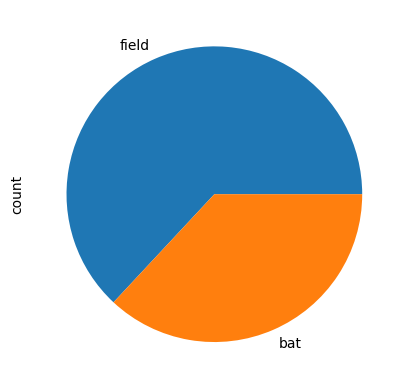

In [186]:
ipl['TossDecision'].value_counts().plot(kind='pie')

## **Number of matches each team has played**


In [187]:
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending = False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


## **`sort_values`**

In [188]:
x = pd.Series([12, 14, 1, 56, 89])
print("Before Sorting: ")
print(x)
print()
print("After Sorting (Descending Order): ")
print(x.sort_values(ascending = False))

Before Sorting: 
0    12
1    14
2     1
3    56
4    89
dtype: int64

After Sorting (Descending Order): 
4    89
3    56
1    14
0    12
2     1
dtype: int64


In [189]:
# Sorting to the columns
movies.sort_values('title_x', ascending = False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


## **sort values on nan values**

In [190]:
students = pd.DataFrame(
    {
        'name': ['William', 'Anna', 'Richard', np.nan, 'Markus', np.nan, 'Ricosta', np.nan, 'John', np.nan],
        'college': ['Stanford', 'UCLA', 'MIT', np.nan, np.nan, 'Princeton', 'Harvard', np.nan, np.nan, 'Purdue'],
        'majors': ['Astrophysics', 'Law', 'EECS', np.nan, 'ME', 'AI', 'Computer Vision', 'Dental', 'Psychology', np.nan],
        'gpa': [3.9, 4.0, 3.7, np.nan, 3.8, 4.0, 3.8, 4.0, 3.1, np.nan],
        'CTC': [40, 59, 70, np.nan, 66, 78, 89, 97, np.nan, np.nan]
    }
)
students

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
1,Anna,UCLA,Law,4.0,59.0
2,Richard,MIT,EECS,3.7,70.0
3,NaN,NaN,NaN,NaN,NaN
4,Markus,NaN,ME,3.8,66.0
5,NaN,Princeton,AI,4.0,78.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
7,NaN,NaN,Dental,4.0,97.0
8,John,NaN,Psychology,3.1,NaN
9,NaN,Purdue,NaN,NaN,NaN


In [191]:
students.sort_values('name') # Temporary Changes

,name,college,majors,gpa,CTC
1,Anna,UCLA,Law,4.0,59.0
8,John,NaN,Psychology,3.1,NaN
4,Markus,NaN,ME,3.8,66.0
2,Richard,MIT,EECS,3.7,70.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
0,William,Stanford,Astrophysics,3.9,40.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,Princeton,AI,4.0,78.0
7,NaN,NaN,Dental,4.0,97.0
9,NaN,Purdue,NaN,NaN,NaN


In [192]:
students.sort_values('name', na_position = 'first') # Temporary Changes

,name,college,majors,gpa,CTC
3,NaN,NaN,NaN,NaN,NaN
5,NaN,Princeton,AI,4.0,78.0
7,NaN,NaN,Dental,4.0,97.0
9,NaN,Purdue,NaN,NaN,NaN
1,Anna,UCLA,Law,4.0,59.0
8,John,NaN,Psychology,3.1,NaN
4,Markus,NaN,ME,3.8,66.0
2,Richard,MIT,EECS,3.7,70.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
0,William,Stanford,Astrophysics,3.9,40.0


In [193]:
students.sort_values('name', na_position = 'first', ascending = False) # Temporary Changes

,name,college,majors,gpa,CTC
3,NaN,NaN,NaN,NaN,NaN
5,NaN,Princeton,AI,4.0,78.0
7,NaN,NaN,Dental,4.0,97.0
9,NaN,Purdue,NaN,NaN,NaN
0,William,Stanford,Astrophysics,3.9,40.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
2,Richard,MIT,EECS,3.7,70.0
4,Markus,NaN,ME,3.8,66.0
8,John,NaN,Psychology,3.1,NaN
1,Anna,UCLA,Law,4.0,59.0


In [194]:
students.sort_values('name', na_position = 'first', ascending = False, inplace = True) # Permanent Changes
students

,name,college,majors,gpa,CTC
3,NaN,NaN,NaN,NaN,NaN
5,NaN,Princeton,AI,4.0,78.0
7,NaN,NaN,Dental,4.0,97.0
9,NaN,Purdue,NaN,NaN,NaN
0,William,Stanford,Astrophysics,3.9,40.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
2,Richard,MIT,EECS,3.7,70.0
4,Markus,NaN,ME,3.8,66.0
8,John,NaN,Psychology,3.1,NaN
1,Anna,UCLA,Law,4.0,59.0


## **sorting on multiple columns**

In [195]:
movies.sort_values(['year_of_release', 'title_x'], ascending = [True, False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


## **`rank`**
This is only applicable to series only.

In [196]:
runs['batting_rank'] =  runs['batsman_run'].rank(ascending = False)
runs.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [197]:
runs[runs['batter'] == 'MS Dhoni']

,batter,batsman_run,batting_rank
339,MS Dhoni,4978,8.0


In [198]:
runs[runs['batter'] == 'SR Tendulkar']

,batter,batsman_run,batting_rank
510,SR Tendulkar,2334,39.0


In [199]:
runs[runs['batter'] == 'Yuvraj Singh']

,batter,batsman_run,batting_rank
603,Yuvraj Singh,2754,27.0


## **`sort index`**
This is applicable on both: series and dataframe

In [200]:
marks = {
    'maths': 67,
    'english': 57,
    'science': 47,
    'geology': 99
}
marks_df = pd.Series(marks)
marks_df

,0
maths,67
english,57
science,47
geology,99


In [201]:
marks_df.sort_index()

,0
english,57
geology,99
maths,67
science,47


In [202]:
marks_df.sort_index(ascending = False)

,0
science,47
maths,67
geology,99
english,57


In [203]:
movies.sort_index(ascending = False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


## **`set index`**

This is used for dataframe only.

In [204]:
runs.set_index('batter') # Temporary Change
# runs.set_index('batter', inplace = True) # Permanent Change

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [205]:
runs.set_index('batter', inplace = True)

In [206]:
runs

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


## **`reset index`**
This is applicable on series and dataframe both. It is a drop parameter.

In [207]:
runs.reset_index(drop = True) # Temporary Change
# runs.reset_index(drop = True, inplace = True) # Permanent Change

,batsman_run,batting_rank
0,280,166.5
1,161,226.0
2,4,535.0
3,53,329.0
4,25,402.5
...,...,...
600,0,594.0
601,47,343.0
602,3,547.5
603,2754,27.0


## **How to replace existing index without loosing**

In [208]:
# Problem: Making Batting Rank as Index
# Step 1: We can perform this by using the set index however it will lose the batter column.
# Step 2: We will perform this by using the reset_index
runs.reset_index().set_index('batting_rank').sort_index()

,batter,batsman_run
batting_rank,,
1.0,V Kohli,6634
2.0,S Dhawan,6244
3.0,DA Warner,5883
4.0,RG Sharma,5881
5.0,SK Raina,5536
...,...,...
594.0,SS Cottrell,0
594.0,S Kaushik,0
594.0,IC Pandey,0


## **Series to dataframe using `reset_index`**

In [209]:
marks_df.reset_index()

,index,0
0,maths,67
1,english,57
2,science,47
3,geology,99


In [210]:
type(marks_df.reset_index())

pandas.core.frame.DataFrame

## **`rename`**
- It is only applicable at dataframe.
- Applicable on columns and indexes.

In [211]:
movies.set_index('title_x', inplace = True)

In [212]:
movies.head()

,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [213]:
movies.rename(columns = {'imdb_id': 'imdb', 'poster_path': 'link'}) # Temporary Changes

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [214]:
movies.rename(columns = {'imdb_id': 'imdb', 'poster_path': 'link'}, inplace = True) # Permanent Changes

In [215]:
movies.head(2)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [216]:
movies.rename(index = {'Uri: The Surgical Strike': 'Uri', 'Battalion 609': 'Battalion'})
movies.head(2)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


## **`unique`**
- It is applicable only on Series

In [217]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5])
print(temp.unique())

[1 2 3 4 5]


In [218]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)
print()
print(temp.unique())

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64

[ 1.  2.  3.  4.  5. nan]


In [219]:
print(ipl['Season'].unique().shape)
print(len(ipl['Season'].unique()))

(15,)
15


## **`nunique`**
- It is applicable at both Series and Dataframe

In [220]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print("Length using unique(): ", len(temp.unique()))
print("Length using nunique(): ", temp.nunique())

Length using unique():  6
Length using nunique():  5


In [221]:
print(ipl['Season'].nunique()) # Counting number of unique values.

15


## **`isnull` / `notnull` / `hasnan`**

- `isnull` and `notnull` are applicable for both series and dataframe.
- `hasnan` is applicable in series only.


In [222]:
# isnull: Checking the null values
students['name'].isnull()
print(students[students['name'].isnull()])

  name    college  majors  gpa   CTC
3  NaN        NaN     NaN  NaN   NaN
5  NaN  Princeton      AI  4.0  78.0
7  NaN        NaN  Dental  4.0  97.0
9  NaN     Purdue     NaN  NaN   NaN


In [223]:
# notnull
students[students['name'].notnull()]

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
2,Richard,MIT,EECS,3.7,70.0
4,Markus,NaN,ME,3.8,66.0
8,John,NaN,Psychology,3.1,NaN
1,Anna,UCLA,Law,4.0,59.0


In [224]:
# hasnans
students['name'].hasnans

True

In [225]:
students.isnull()

,name,college,majors,gpa,CTC
3,True,True,True,True,True
5,True,False,False,False,False
7,True,True,False,False,False
9,True,False,True,True,True
0,False,False,False,False,False
6,False,False,False,False,False
2,False,False,False,False,False
4,False,True,False,False,False
8,False,True,False,False,True
1,False,False,False,False,False


In [226]:
students.isnull().sum()

,0
name,4
college,4
majors,2
gpa,2
CTC,3


In [227]:
students.notnull()

,name,college,majors,gpa,CTC
3,False,False,False,False,False
5,False,True,True,True,True
7,False,False,True,True,True
9,False,True,False,False,False
0,True,True,True,True,True
6,True,True,True,True,True
2,True,True,True,True,True
4,True,False,True,True,True
8,True,False,True,True,False
1,True,True,True,True,True


In [228]:
students.notnull().sum()

,0
name,6
college,6
majors,8
gpa,8
CTC,7


## **`dropna`**
- Used to drop the missing values
- It is used in both series and dataframe.

If it see any missing value in the dataframe then it will drop that row.

In [229]:
# Working on Series
students['name'].dropna()

,name
0,William
6,Ricosta
2,Richard
4,Markus
8,John
1,Anna


In [230]:
# Working on Dataframe
students.dropna()

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
2,Richard,MIT,EECS,3.7,70.0
1,Anna,UCLA,Law,4.0,59.0


In [231]:
# Dropping only when all rows have NaN
students.dropna(how = "all").sort_index()

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
1,Anna,UCLA,Law,4.0,59.0
2,Richard,MIT,EECS,3.7,70.0
4,Markus,NaN,ME,3.8,66.0
5,NaN,Princeton,AI,4.0,78.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
7,NaN,NaN,Dental,4.0,97.0
8,John,NaN,Psychology,3.1,NaN
9,NaN,Purdue,NaN,NaN,NaN


In [232]:
# Dropping where the name column consist of the NaN
students.dropna(subset = ['name']).sort_index()

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
1,Anna,UCLA,Law,4.0,59.0
2,Richard,MIT,EECS,3.7,70.0
4,Markus,NaN,ME,3.8,66.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
8,John,NaN,Psychology,3.1,NaN


In [233]:
# Dropping the multiple columns: name and college.
students.dropna(subset = ['name', 'college']).sort_index()

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
1,Anna,UCLA,Law,4.0,59.0
2,Richard,MIT,EECS,3.7,70.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0


## **`fillna`**
- It fills the data.
- Filling can be done with: mean, median, mode
- It applies on both series and dataframe.


In [234]:
students['name'].fillna('Unknown').sort_index()

,name
0,William
1,Anna
2,Richard
3,Unknown
4,Markus
5,Unknown
6,Ricosta
7,Unknown
8,John
9,Unknown


In [235]:
students.fillna(0).sort_index()
# Its not a good idea, string is replaced by 0. You should try column by column fill

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
1,Anna,UCLA,Law,4.0,59.0
2,Richard,MIT,EECS,3.7,70.0
3,0,0,0,0.0,0.0
4,Markus,0,ME,3.8,66.0
5,0,Princeton,AI,4.0,78.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
7,0,0,Dental,4.0,97.0
8,John,0,Psychology,3.1,0.0
9,0,Purdue,0,0.0,0.0


In [236]:
students['CTC'].fillna(students['CTC'].mean()).sort_index()

,CTC
0,40.000000
1,59.000000
2,70.000000
3,71.285714
4,66.000000
5,78.000000
6,89.000000
7,97.000000
8,71.285714
9,71.285714


In [237]:
# Backward Fill
students['name'].fillna(method = 'bfill')

<ipython-input-237-838cf1633d9e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method = 'bfill')


,name
3,William
5,William
7,William
9,William
0,William
6,Ricosta
2,Richard
4,Markus
8,John
1,Anna


In [238]:
students['name'].sort_index().fillna(method = 'ffill')

<ipython-input-238-e99a5896686c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].sort_index().fillna(method = 'ffill')


,name
0,William
1,Anna
2,Richard
3,Richard
4,Markus
5,Markus
6,Ricosta
7,Ricosta
8,John
9,John


In [239]:
# Forward Fill
students['college'].fillna(method = 'ffill').sort_index()

<ipython-input-239-9a0ebdb9d25d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['college'].fillna(method = 'ffill').sort_index()


,college
0,Stanford
1,UCLA
2,MIT
3,NaN
4,MIT
5,Princeton
6,Harvard
7,Princeton
8,MIT
9,Purdue


## **`drop_duplicates`**

In [240]:
marks_df = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks_df

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [241]:
marks_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,True


In [242]:
marks_df.duplicated().sum()

1

In [243]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5])
temp.drop_duplicates()

,0
0,1
2,2
4,3
6,4
8,5


In [244]:
# Dropping the duplicates in marks_df
marks_df.drop_duplicates()

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


In [245]:
# Dropping the duplicates in marks_df
marks_df.drop_duplicates(keep = 'last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


## **Find the last match played by Virat Kohli in Delhi**

In [250]:
ipl['All_Players'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,All_Players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."


In [251]:
def did_kohli_played(players_list):
  return 'V Kohli' in players_list
players1 = ['V Kohli', 'MS Dhoni']
players2 = ['S Raina', 'MS Dhoni']
print(did_kohli_played(players1))
print(did_kohli_played(players2))

True
False


In [252]:
ipl['Kohli_Played'] = ipl['All_Players'].apply(did_kohli_played)
ipl['Kohli_Played'].head(10)

,Kohli_Played
0,False
1,True
2,True
3,False
4,False
5,False
6,False
7,True
8,False
9,False


In [257]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'All_Players', 'Kohli_Played'],
      dtype='object')

In [261]:
new_df = ipl[(ipl['City'] == 'Delhi') & (ipl['Kohli_Played'] == True)][['City', 'Kohli_Played', 'WinningTeam', 'Season']]
new_df

,City,Kohli_Played,WinningTeam,Season
208,Delhi,True,Delhi Capitals,2019
269,Delhi,True,Royal Challengers Bangalore,2018
318,Delhi,True,Royal Challengers Bangalore,2017
467,Delhi,True,Royal Challengers Bangalore,2015
571,Delhi,True,Royal Challengers Bangalore,2013
638,Delhi,True,Royal Challengers Bangalore,2012
746,Delhi,True,Royal Challengers Bangalore,2011
801,Delhi,True,Delhi Daredevils,2009/10
933,Delhi,True,Delhi Daredevils,2007/08


## **`drop`**
- Applicable on both Series and DataFrame

In [262]:
temp = pd.Series([10, 2, 3, 16, 45, 78, 10])
temp

,0
0,10
1,2
2,3
3,16
4,45
5,78
6,10


In [263]:
temp.drop([0, 6])

,0
1,2
2,3
3,16
4,45
5,78


In [267]:
students
students.drop(columns = ['majors', 'gpa']).sort_index() # Temporary Changes

,name,college,CTC
0,William,Stanford,40.0
1,Anna,UCLA,59.0
2,Richard,MIT,70.0
3,NaN,NaN,NaN
4,Markus,NaN,66.0
5,NaN,Princeton,78.0
6,Ricosta,Harvard,89.0
7,NaN,NaN,97.0
8,John,NaN,NaN
9,NaN,Purdue,NaN


In [271]:
students.drop(index = [3,8]).sort_index()

,name,college,majors,gpa,CTC
0,William,Stanford,Astrophysics,3.9,40.0
1,Anna,UCLA,Law,4.0,59.0
2,Richard,MIT,EECS,3.7,70.0
4,Markus,NaN,ME,3.8,66.0
5,NaN,Princeton,AI,4.0,78.0
6,Ricosta,Harvard,Computer Vision,3.8,89.0
7,NaN,NaN,Dental,4.0,97.0
9,NaN,Purdue,NaN,NaN,NaN


## **`apply`**
- Applicable on both Series and Dataframe

In [272]:
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [273]:
def euclidean_distance(row):
  pt_a = row['1st point']
  pt_b = row['2nd point']
  return ((pt_a[0] - pt_b[0]) ** 2 + (pt_a[1] - pt_b[1]) ** 2) ** 0.5

In [274]:
points_df['distance'] = points_df.apply(euclidean_distance, axis = 1)
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
